In [1]:
#_____________import labs
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Rizwan/Desktop/datasets/BankChurners.csv")

In [3]:
df.sample(8)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
3144,779289033,Existing Customer,46,F,3,Uneducated,Single,Unknown,Blue,28,...,21646.0,1778,19868.0,1.071,3328,61,0.794,0.082,0.000292,0.99971
6654,713923233,Existing Customer,46,M,3,High School,Married,$80K - $120K,Blue,36,...,2790.0,2185,605.0,0.671,3392,86,0.755,0.783,0.000305,0.99969
6028,779281233,Existing Customer,45,F,3,Graduate,Single,Unknown,Blue,27,...,2478.0,1748,730.0,0.643,4353,80,0.667,0.705,0.000314,0.99969
5113,715502808,Existing Customer,42,M,3,High School,Married,$80K - $120K,Blue,36,...,25944.0,1987,23957.0,0.566,4442,76,0.767,0.077,0.000181,0.99982
16,709967358,Existing Customer,48,M,4,Post-Graduate,Single,$80K - $120K,Blue,36,...,30367.0,2362,28005.0,1.708,1671,27,0.929,0.078,0.000236,0.99976
92,714107958,Existing Customer,45,M,1,Graduate,Single,$40K - $60K,Blue,36,...,6576.0,0,6576.0,0.579,1465,34,0.619,0.000,0.000343,0.99966
3326,715378383,Existing Customer,43,F,4,Graduate,Single,Unknown,Silver,36,...,34516.0,1893,32623.0,0.748,3639,76,1.000,0.055,0.000489,0.99951
7041,713567958,Existing Customer,54,F,3,College,Single,Less than $40K,Blue,36,...,2957.0,1408,1549.0,0.667,4280,82,0.783,0.476,0.000219,0.99978


In [4]:
df.keys()




Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
df_dropped = df.iloc[:, 1:-2]


In [6]:
df_dropped.sample(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6891,Attrited Customer,55,F,1,College,Single,Less than $40K,Blue,48,3,5,3,2114.0,546,1568.0,0.619,2578,42,0.750,0.258
9438,Existing Customer,55,M,3,High School,Married,$60K - $80K,Blue,50,2,1,2,5282.0,1144,4138.0,0.800,13513,115,0.597,0.217
7950,Existing Customer,41,F,3,High School,Single,Unknown,Blue,32,2,1,1,4745.0,1157,3588.0,0.965,4705,78,0.902,0.244
4549,Existing Customer,39,F,2,Graduate,Divorced,Less than $40K,Blue,31,5,3,4,6798.0,918,5880.0,0.671,3961,69,0.605,0.135
10047,Attrited Customer,53,M,2,Graduate,Married,$40K - $60K,Blue,36,2,3,4,5735.0,0,5735.0,1.009,9088,64,0.684,0.000


In [7]:
# Iterate through columns and print unique values
for column in df.select_dtypes(exclude="number"):
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Attrition_Flag': ['Existing Customer' 'Attrited Customer']
Unique values in 'Gender': ['M' 'F']
Unique values in 'Education_Level': ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Unique values in 'Marital_Status': ['Married' 'Single' 'Unknown' 'Divorced']
Unique values in 'Income_Category': ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Unique values in 'Card_Category': ['Blue' 'Gold' 'Silver' 'Platinum']


In [8]:
df_dropped.keys()

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [9]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [10]:
df_dropped.duplicated().sum()

0

In [11]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


# Columns for ordinal encoding
ordinal_columns = ['Education_Level', 'Income_Category', 'Card_Category']

# Columns for one-hot encoding
onehot_columns = ['Attrition_Flag', 'Gender', 'Marital_Status']

# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder()
df_dropped[ordinal_columns] = ordinal_encoder.fit_transform(df_dropped[ordinal_columns])

# Apply one-hot encoding
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df_dropped[onehot_columns])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_columns))
df = pd.concat([df_dropped.drop(onehot_columns, axis=1), onehot_encoded_df], axis=1)

# Print the modified DataFrame
df

C:\Users\Rizwan\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,45,3,3.0,2.0,0.0,39,5,1,3,12691.0,...,1.335,1144,42,1.625,0.061,1.0,1.0,1.0,0.0,0.0
1,49,5,2.0,4.0,0.0,44,6,1,2,8256.0,...,1.541,1291,33,3.714,0.105,1.0,0.0,0.0,1.0,0.0
2,51,3,2.0,3.0,0.0,36,4,1,0,3418.0,...,2.594,1887,20,2.333,0.000,1.0,1.0,1.0,0.0,0.0
3,40,4,3.0,4.0,0.0,34,3,4,1,3313.0,...,1.405,1171,20,2.333,0.760,1.0,0.0,0.0,0.0,1.0
4,40,3,5.0,2.0,0.0,21,5,1,0,4716.0,...,2.175,816,28,2.500,0.000,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,2.0,1.0,0.0,40,3,2,3,4003.0,...,0.703,15476,117,0.857,0.462,1.0,1.0,0.0,1.0,0.0
10123,41,2,6.0,1.0,0.0,25,4,2,3,4277.0,...,0.804,8764,69,0.683,0.511,0.0,1.0,0.0,0.0,0.0
10124,44,1,3.0,4.0,0.0,36,5,3,4,5409.0,...,0.819,10291,60,0.818,0.000,0.0,0.0,1.0,0.0,0.0
10125,30,2,2.0,1.0,0.0,36,4,3,3,5281.0,...,0.535,8395,62,0.722,0.000,0.0,1.0,0.0,0.0,1.0


In [12]:
# Identify the float columns
float_columns = df.select_dtypes(include=['float']).columns

# Convert float columns to integers
df[float_columns] = df[float_columns].astype(int)

# Print the dataset with converted integer columns
df.sample(6)

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
7646,48,1,6,4,0,40,3,1,2,3251,...,0,2483,50,0,0,0,0,0,1,0
851,62,0,6,5,0,52,6,1,1,2683,...,1,1582,33,0,0,1,0,1,0,0
6248,48,3,2,2,0,34,6,3,2,11062,...,0,4084,72,0,0,1,1,0,0,0
1577,56,3,0,0,0,43,6,2,2,17539,...,0,1220,30,0,0,1,1,1,0,0
9527,44,4,6,3,0,26,1,2,1,11782,...,0,16605,110,0,0,1,1,0,1,0
4848,40,5,6,5,0,31,6,3,1,4433,...,0,3847,76,0,0,1,0,0,1,0


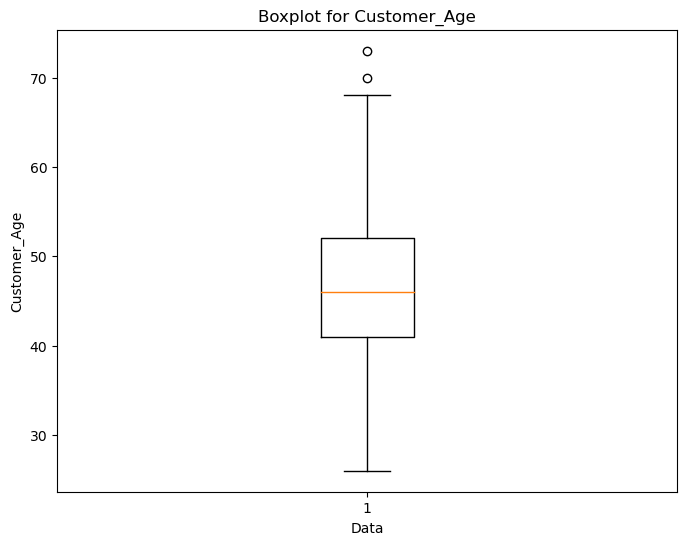

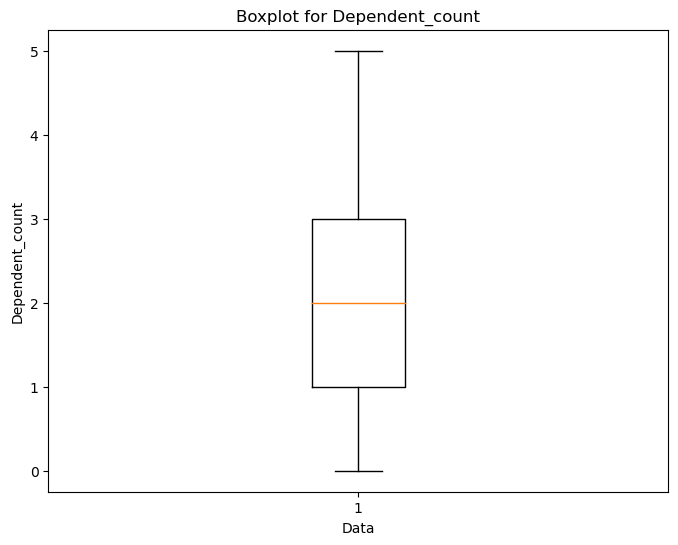

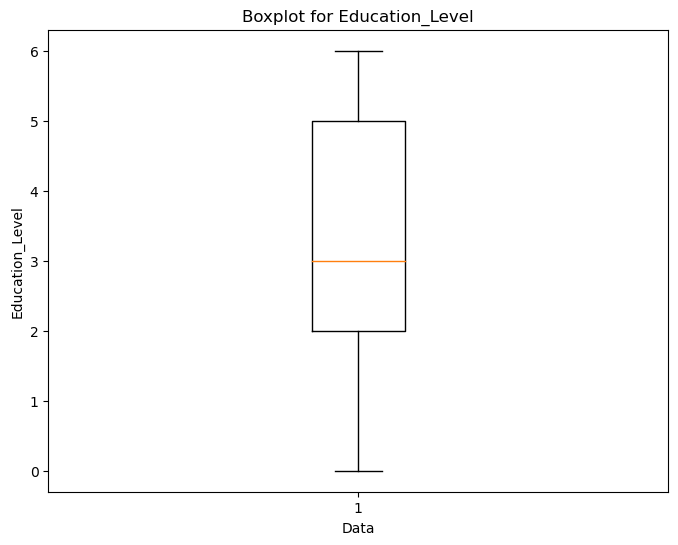

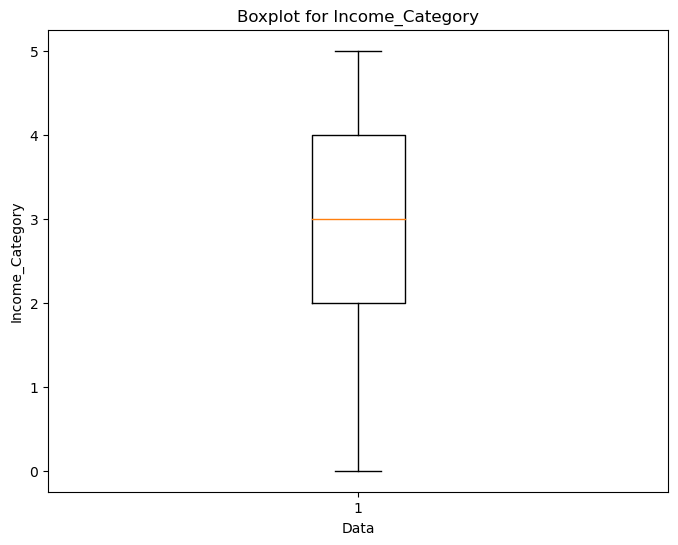

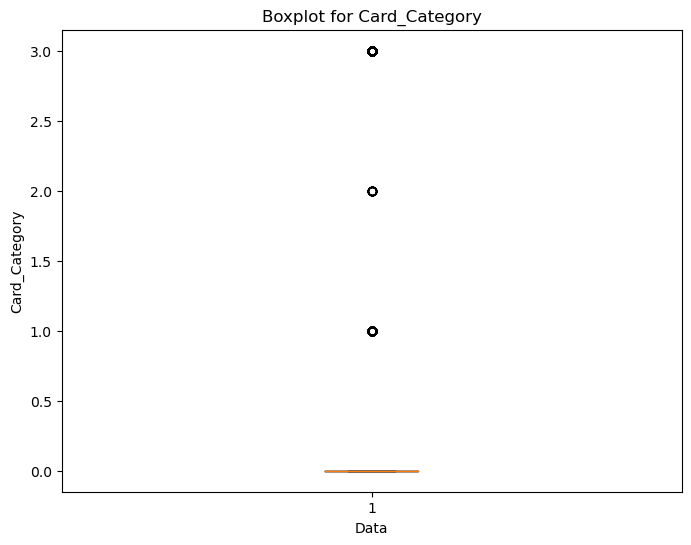

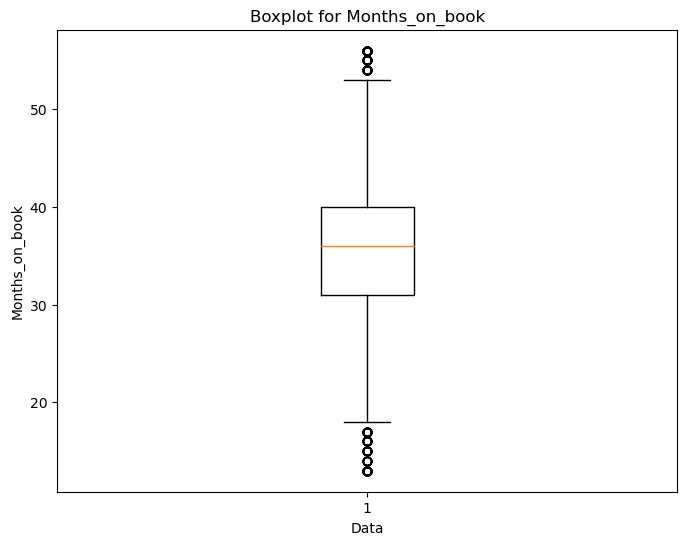

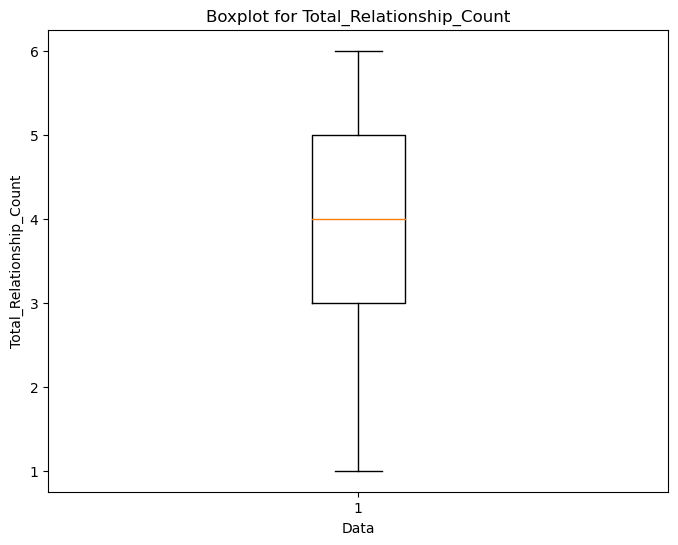

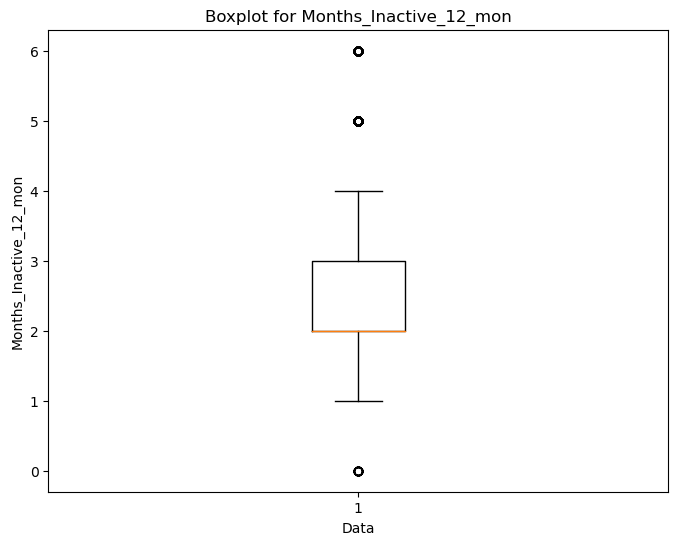

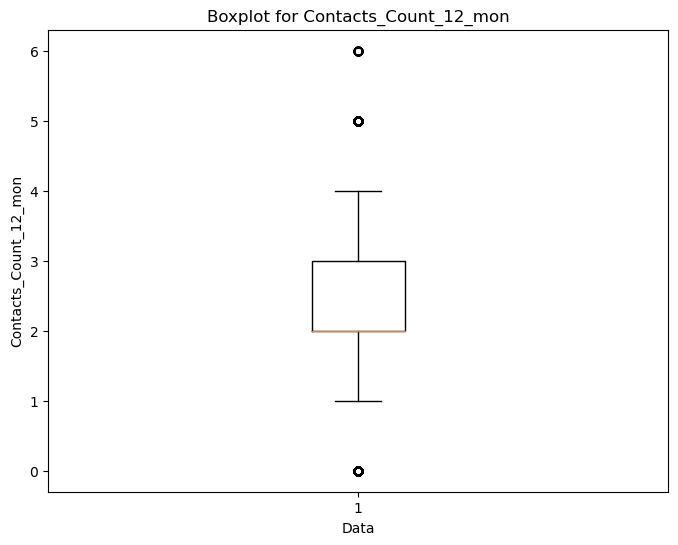

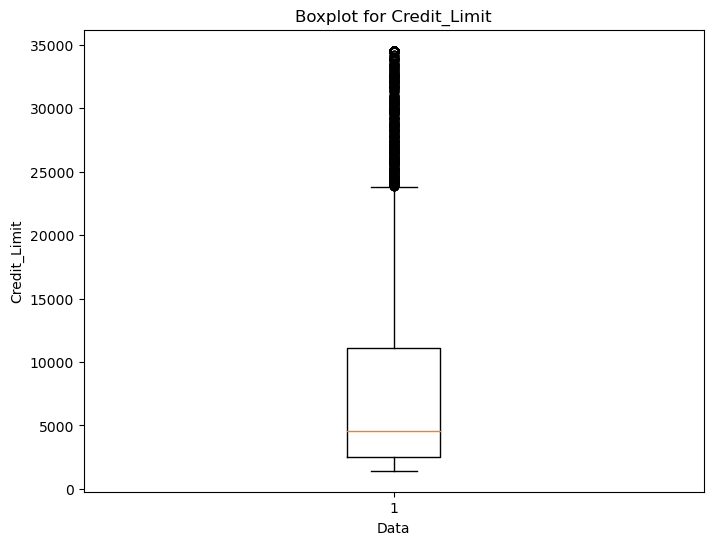

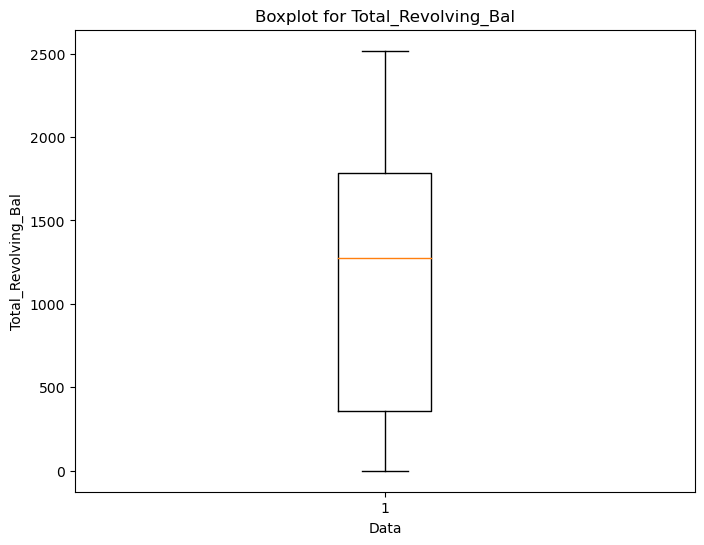

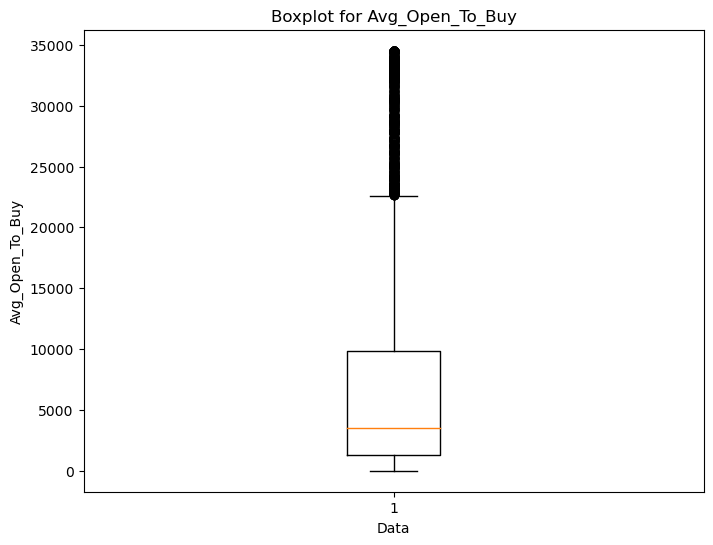

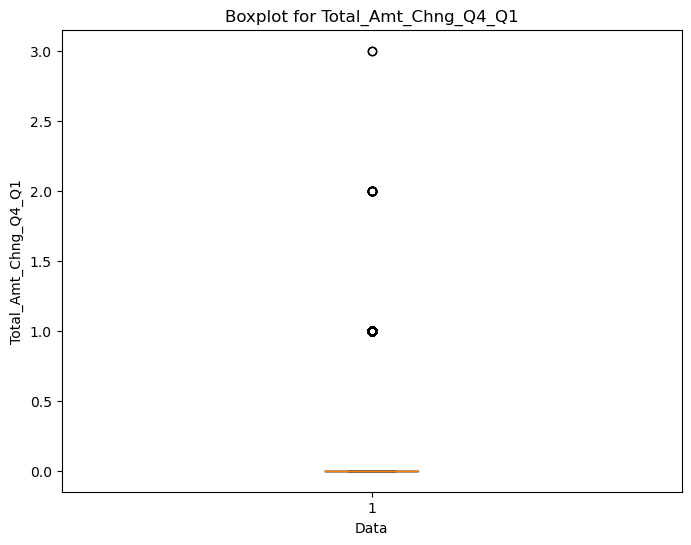

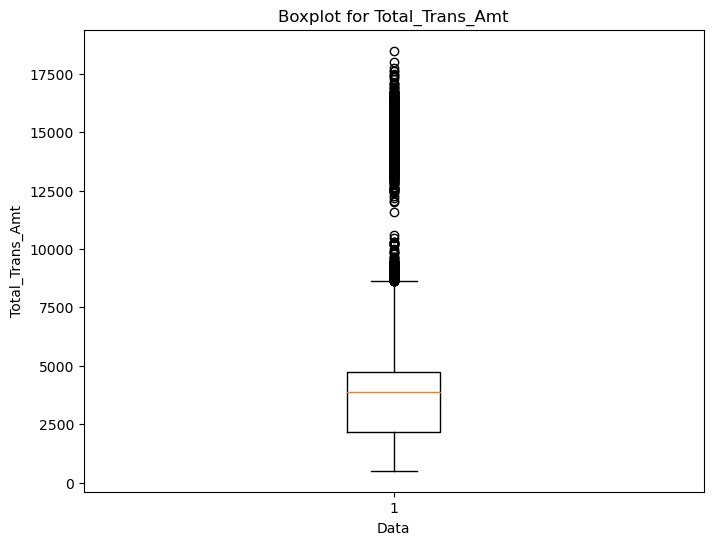

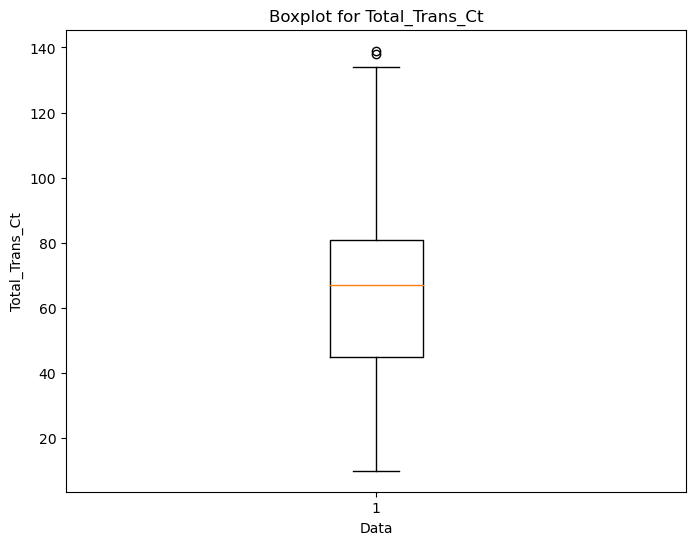

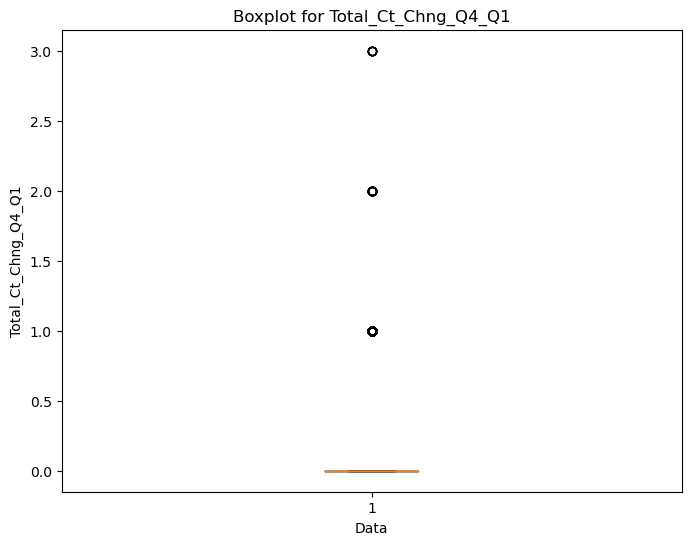

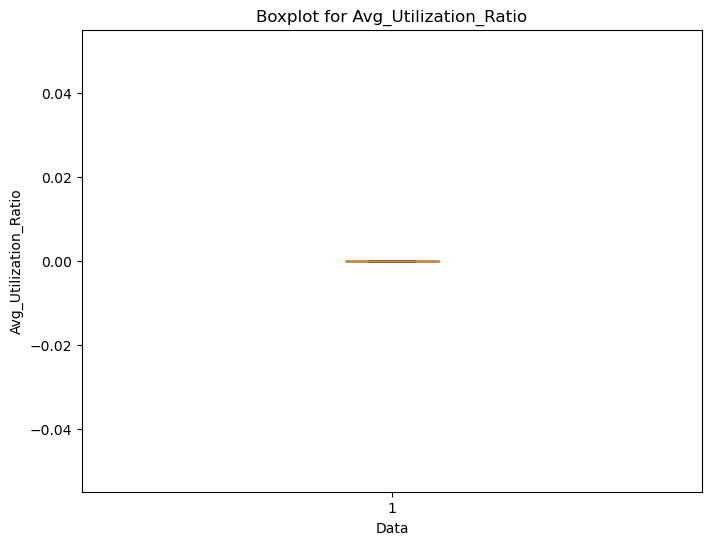

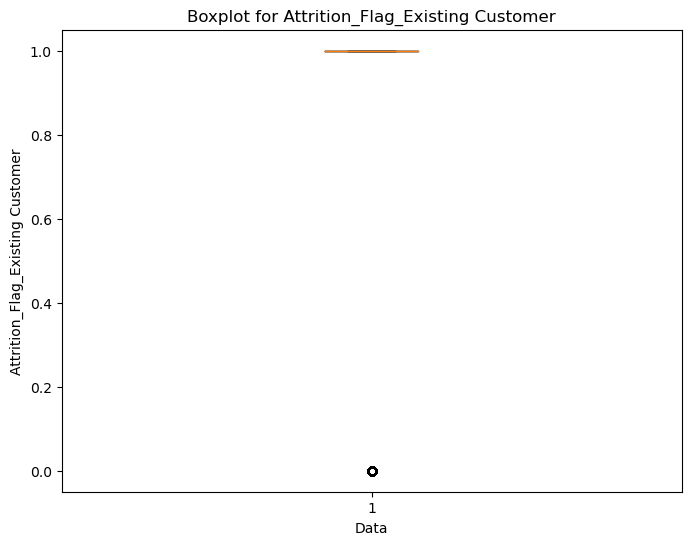

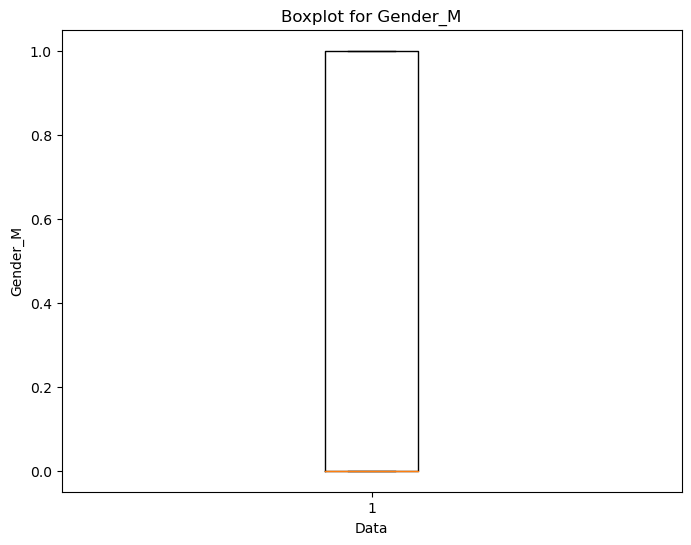

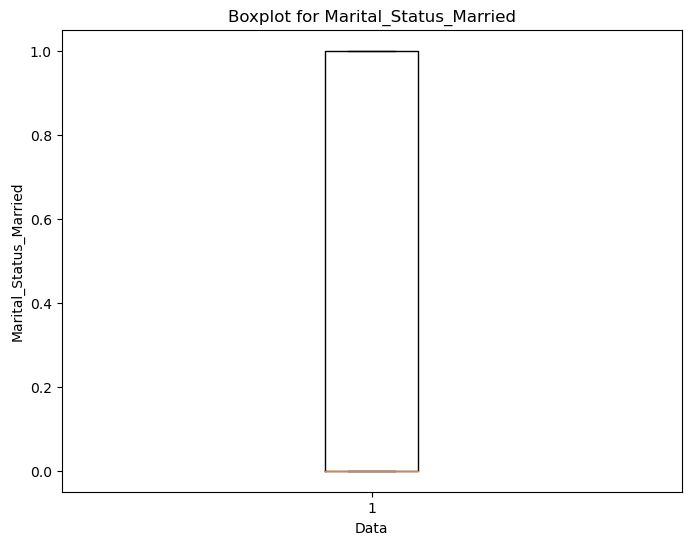

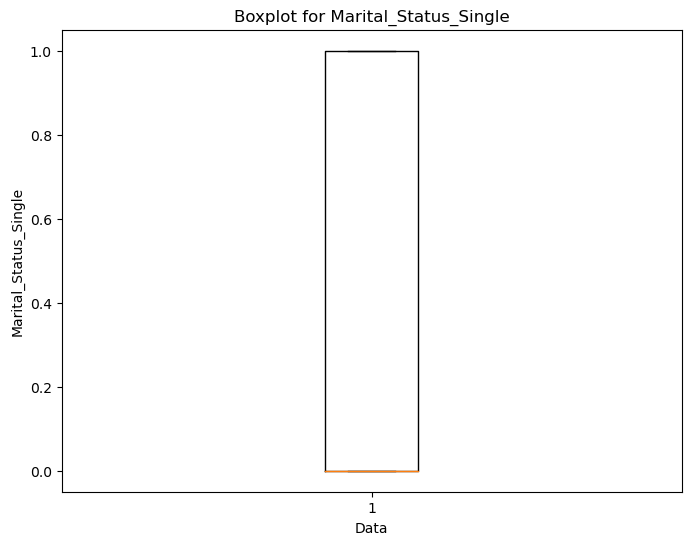

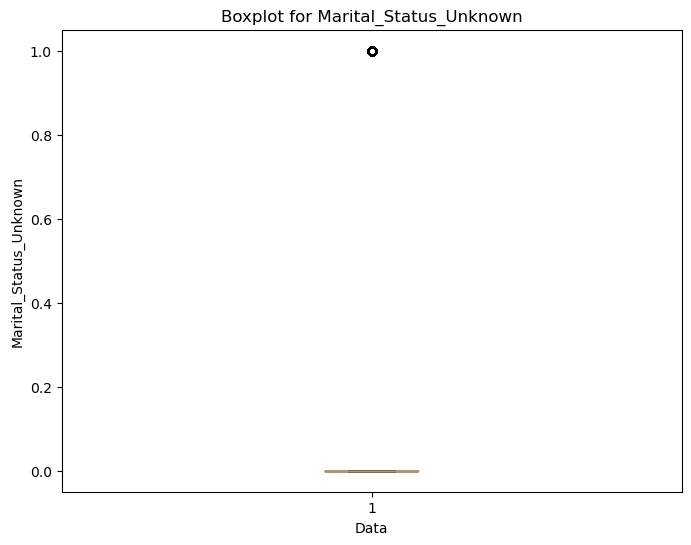

In [13]:

# Create boxplots for each column individually using a for loop
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.title(f'Boxplot for {column}')
    plt.ylabel(column)
    plt.xlabel('Data')
    plt.show()
    plt.close()  # Close the current figure before creating the next one


In [14]:
from scipy.stats import shapiro


# Check normality and apply z-score or IQR method accordingly
z_score_threshold = 3  # Threshold for z-score outliers
iqr_multiplier = 1.5  # Multiplier for IQR outliers

for col in df.columns:
    # Check normality using Shapiro-Wilk test
    _, p_value = shapiro(df[col].dropna())
    
    if p_value > 0.05:
        # Apply z-score method for columns following a normal distribution
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        df[col] = np.where(abs(z_scores) > z_score_threshold, np.nan, df[col])
    else:
        # Apply IQR method for columns not following a normal distribution
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

# Fill outliers with nearest non-outlier values
df_capped = df.fillna(method='bfill').fillna(method='ffill')

# Create a new DataFrame with capped outliers
df = pd.DataFrame(df_capped, columns=df.columns)

# Print the new DataFrame\\
df

C:\Users\Rizwan\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Rizwan\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Rizwan\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Rizwan\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Rizwan\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may no

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,45.0,3.0,3.0,2.0,0.0,39.0,5.0,1.0,3.0,12691.0,...,0.0,1144.0,42.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,49.0,5.0,2.0,4.0,0.0,44.0,6.0,1.0,2.0,8256.0,...,0.0,1291.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,51.0,3.0,2.0,3.0,0.0,36.0,4.0,1.0,1.0,3418.0,...,0.0,1887.0,20.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,40.0,4.0,3.0,4.0,0.0,34.0,3.0,4.0,1.0,3313.0,...,0.0,1171.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,40.0,3.0,5.0,2.0,0.0,21.0,5.0,1.0,2.0,4716.0,...,0.0,816.0,28.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50.0,2.0,2.0,1.0,0.0,40.0,3.0,2.0,3.0,4003.0,...,0.0,8395.0,117.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
10123,41.0,2.0,6.0,1.0,0.0,25.0,4.0,2.0,3.0,4277.0,...,0.0,8395.0,69.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10124,44.0,1.0,3.0,4.0,0.0,36.0,5.0,3.0,4.0,5409.0,...,0.0,8395.0,60.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
10125,30.0,2.0,2.0,1.0,0.0,36.0,4.0,3.0,3.0,5281.0,...,0.0,8395.0,62.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


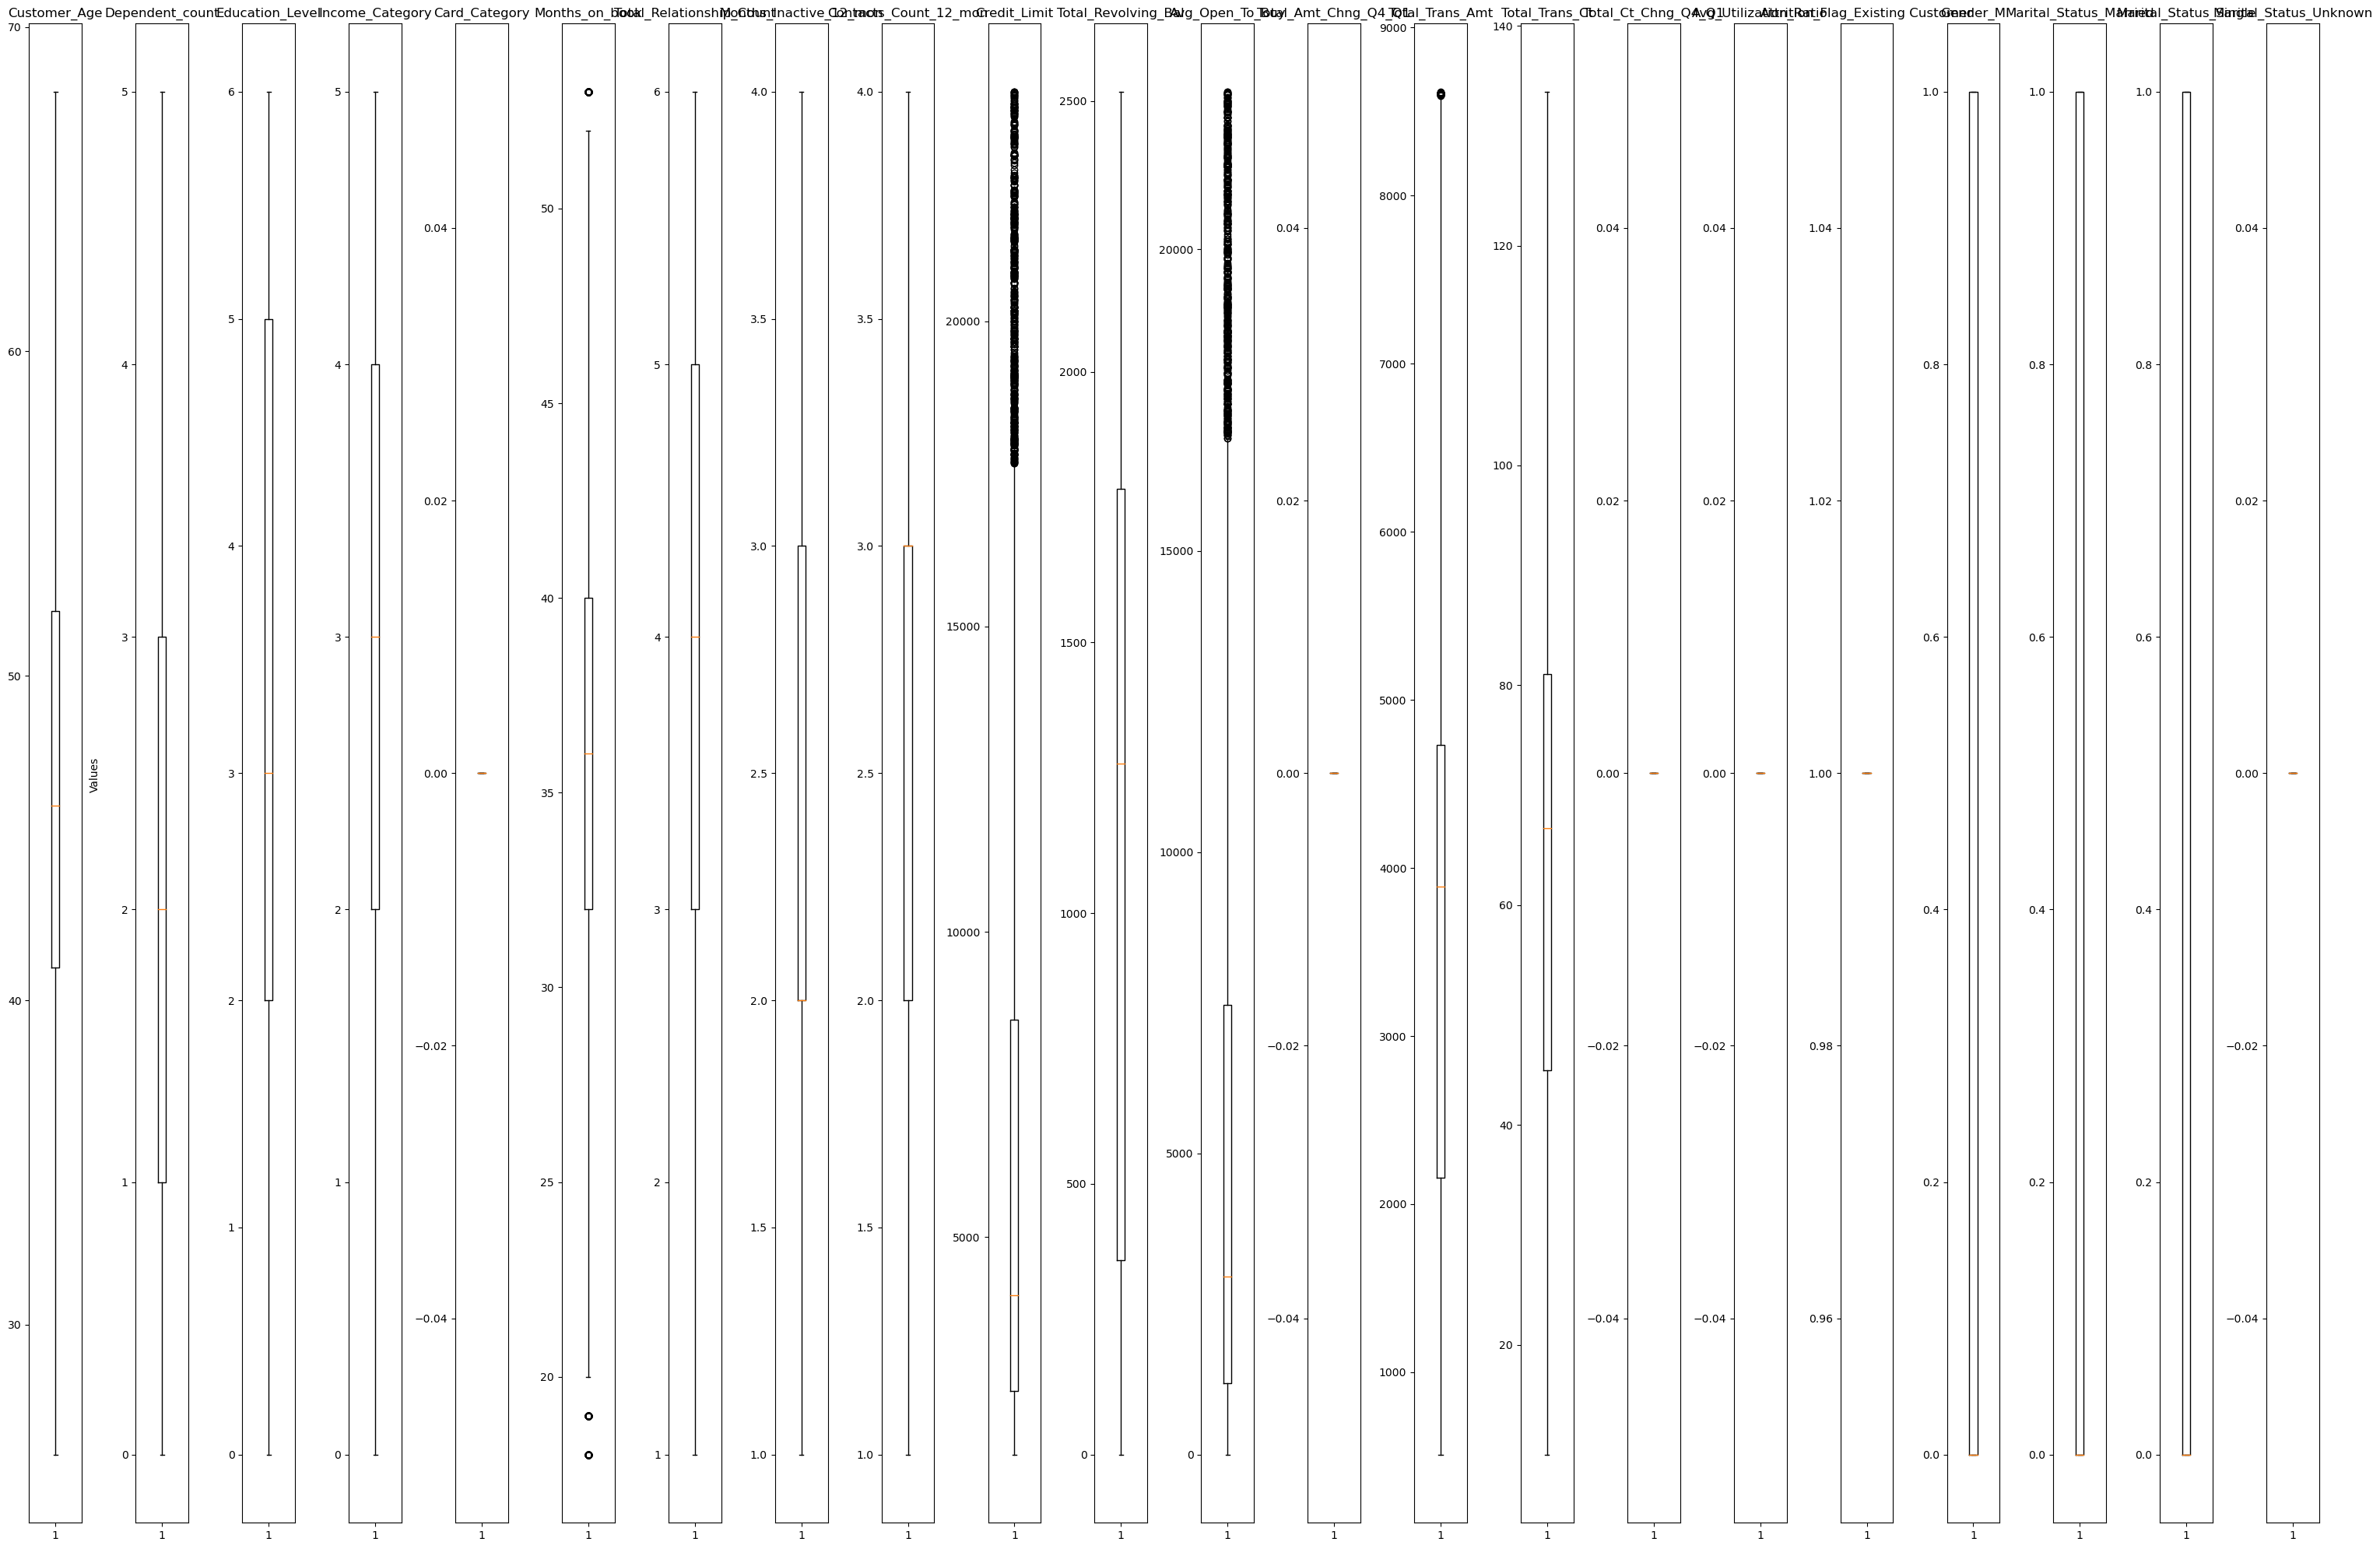

In [15]:
# Create a figure and axes for the box plots
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(30, 20))

# Iterate over each column and create a box plot
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Set the y-axis label for all subplots
fig.text(0.04, 0.5, 'Values', va='center', rotation='vertical')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

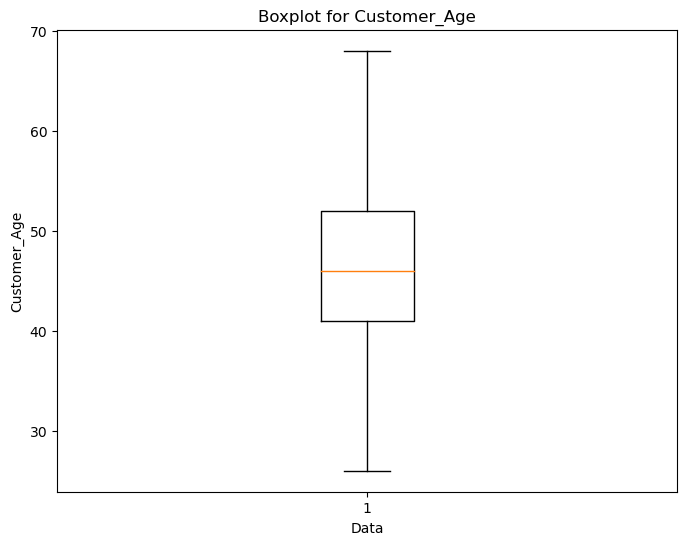

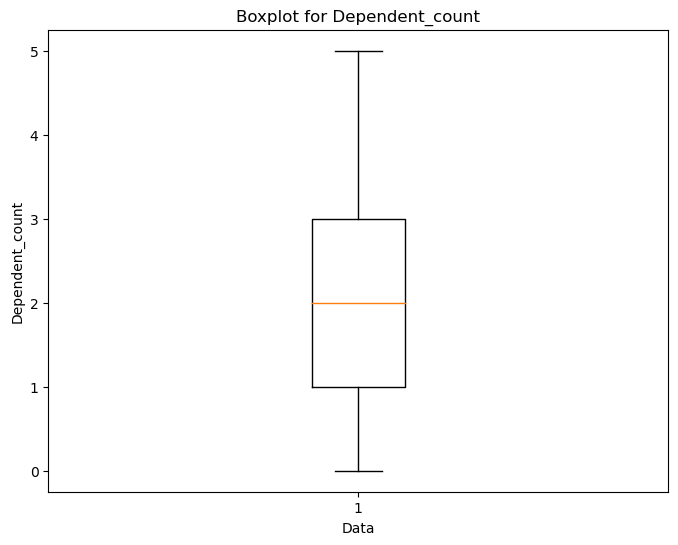

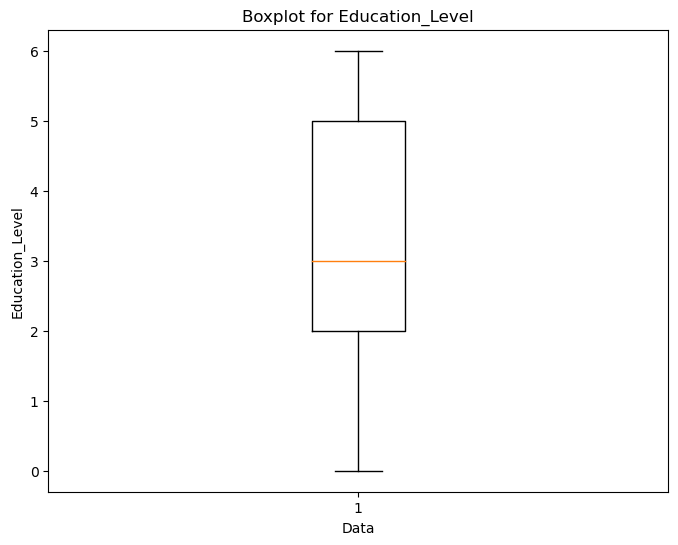

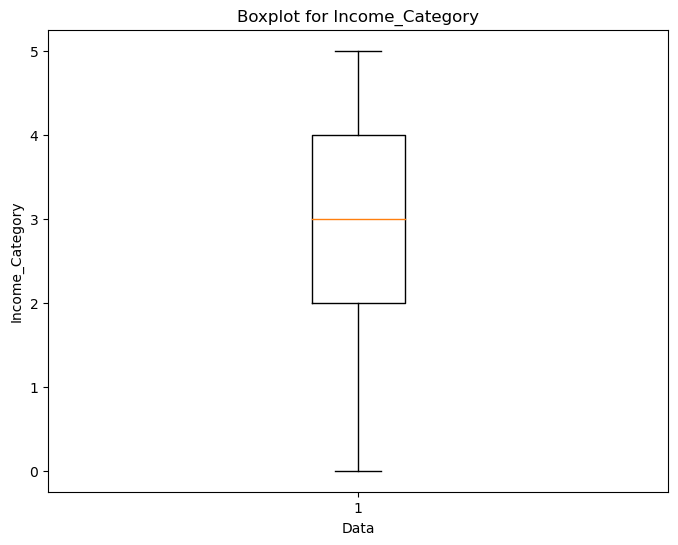

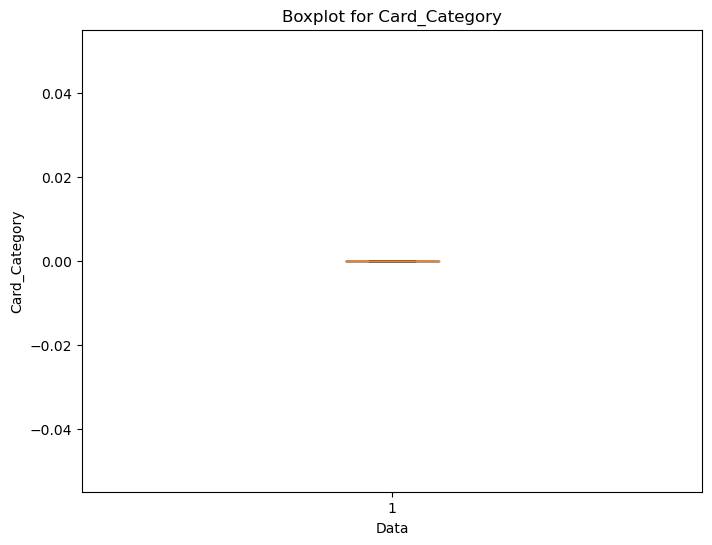

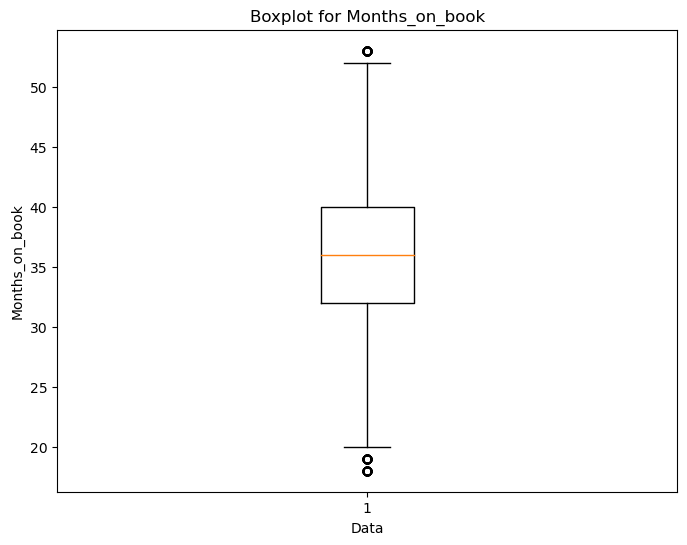

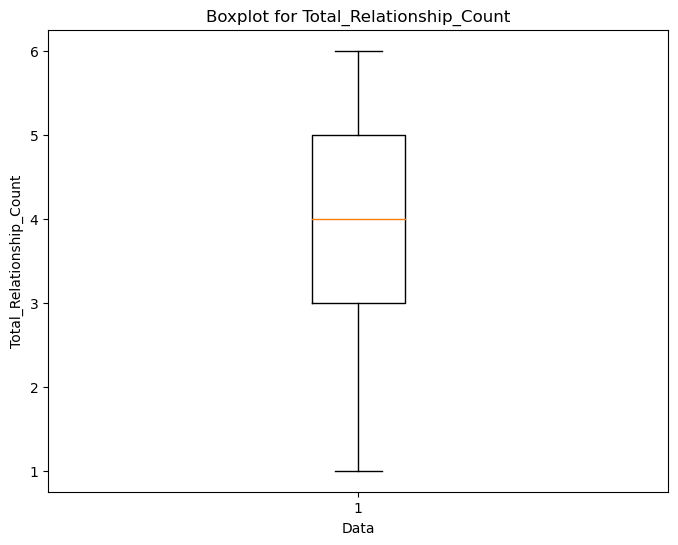

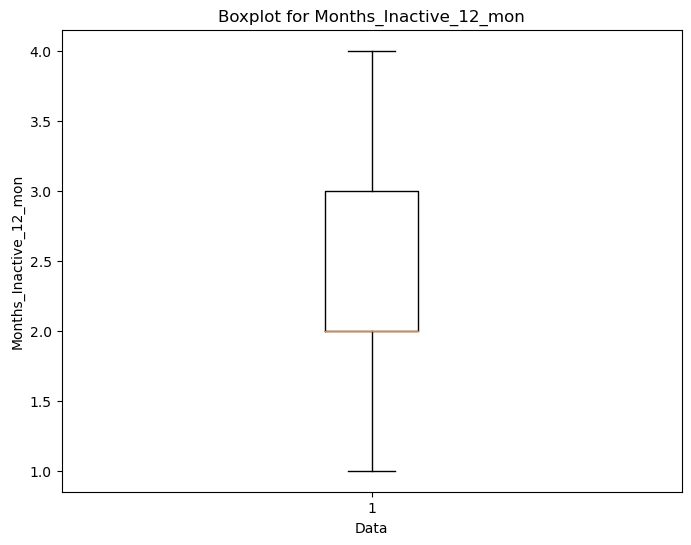

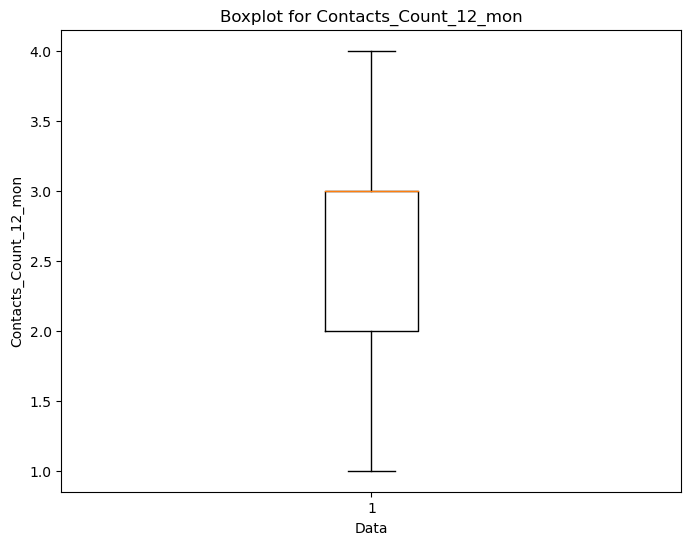

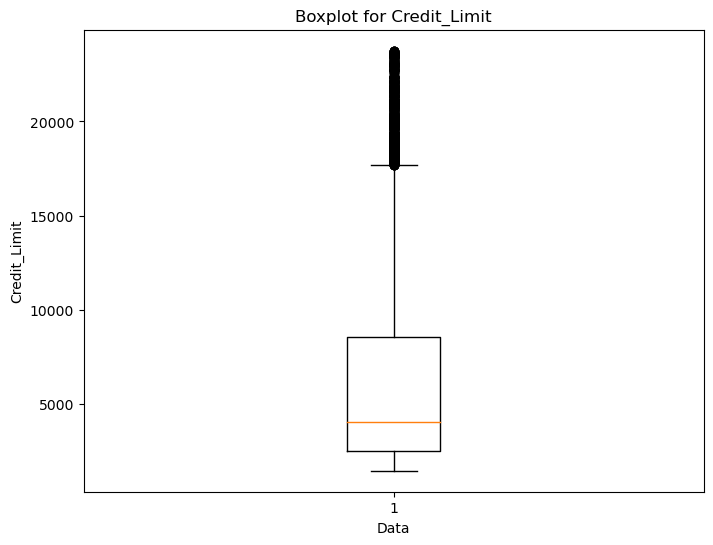

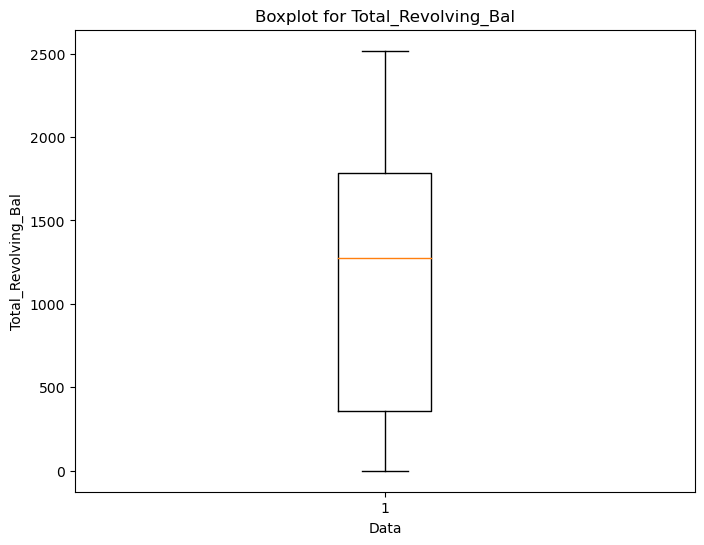

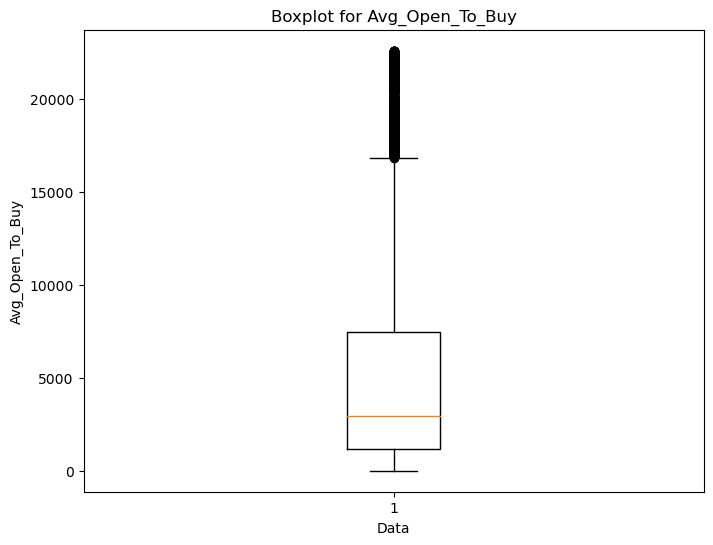

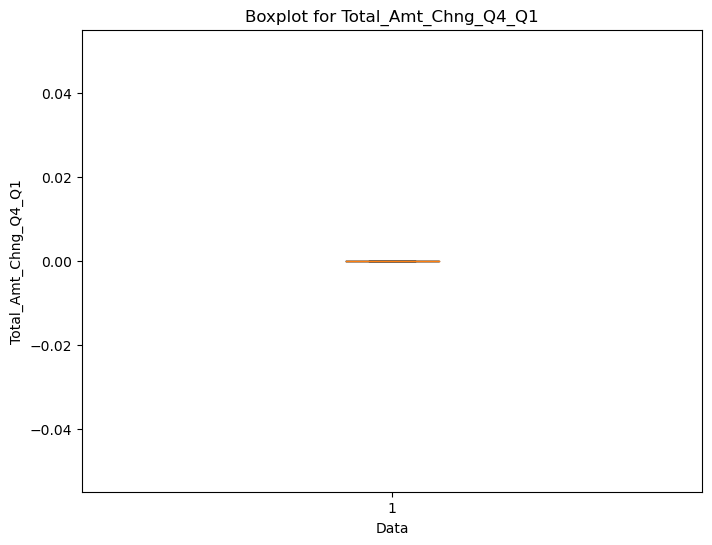

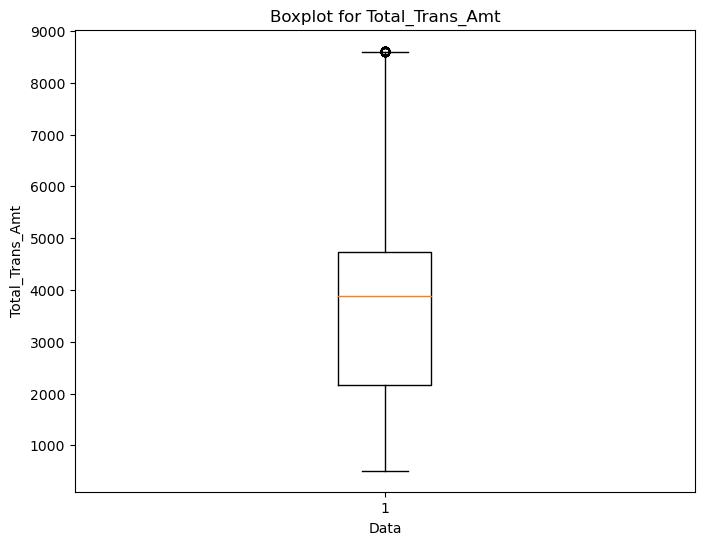

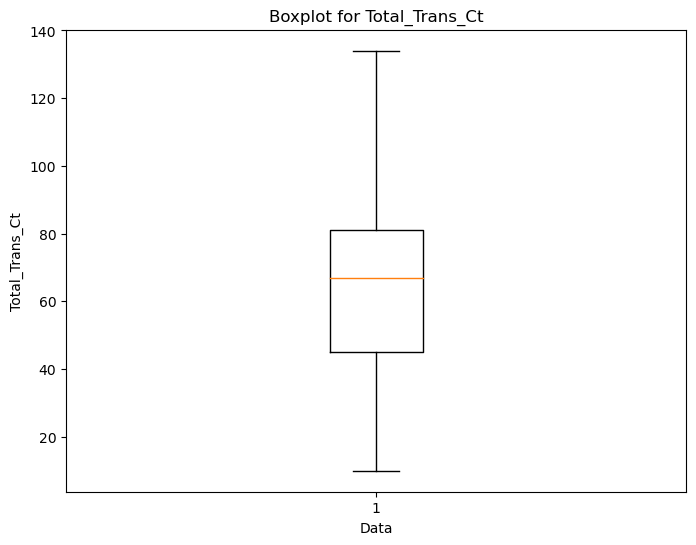

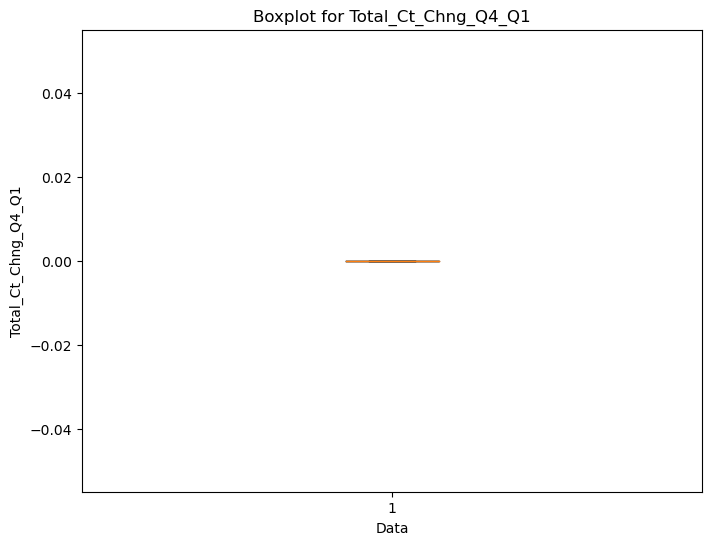

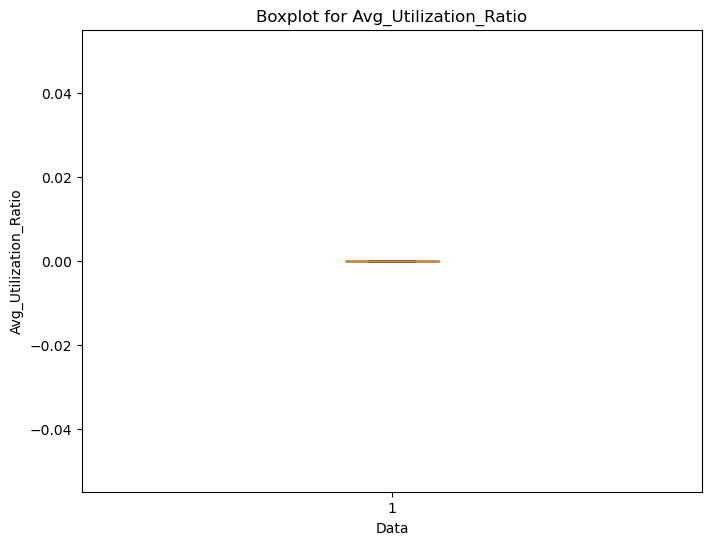

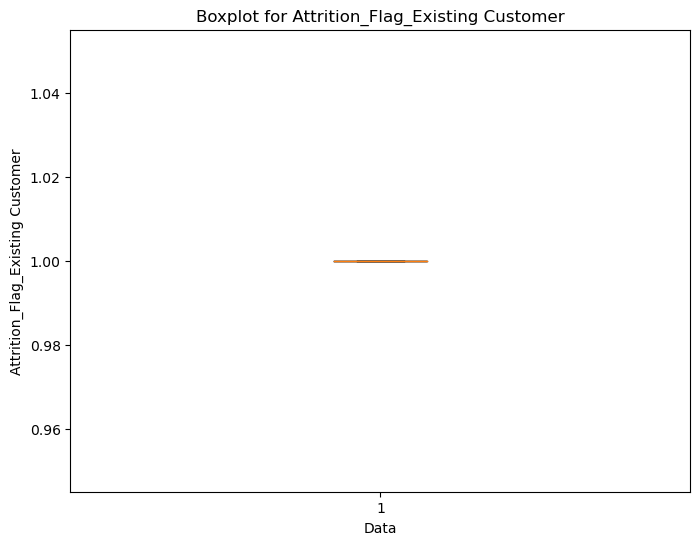

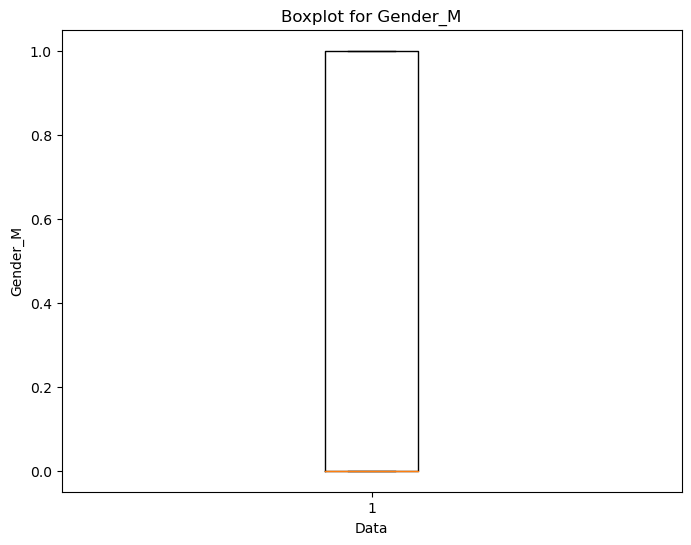

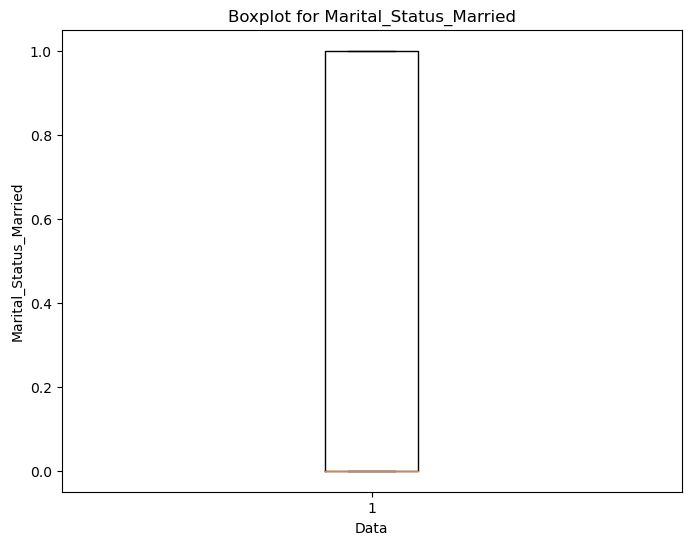

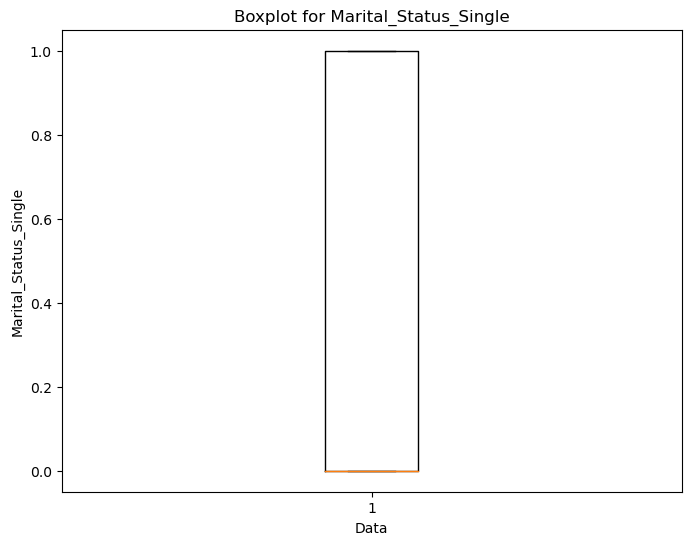

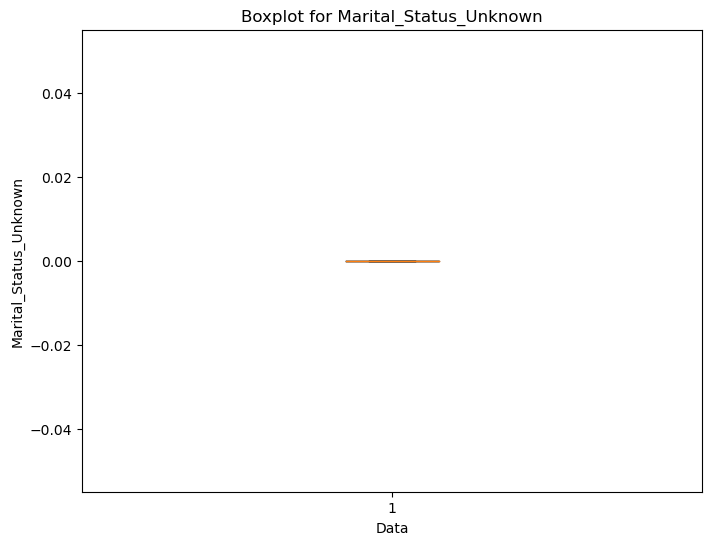

In [16]:

# Create boxplots for each column individually using a for loop
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.title(f'Boxplot for {column}')
    plt.ylabel(column)
    plt.xlabel('Data')
    plt.show()
    plt.close()  # Close the current figure before creating the next one
